# Camera Test Notebook

This notebook helps you verify that your camera is detected by the system, acquire a test image, and explore the image data. You will:
- Check if the camera is visible to the software
- Acquire a single image
- Display the image
- Print the data type and shape
- Plot a histogram of pixel values

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from utils import acquire_images
from copy import copy
from astropy.io import fits
import os
# Define the directory where the images will be saved
outdir = "C:\\Users\\JB_Ch\\Documents\\code\\astrotech\\images"

In [2]:
# Try to acquire a single image
try:
    images = acquire_images(10000, 1)  # 10 ms exposure, 1 image
    img = images[0] if images.ndim == 3 else images
    print("Image acquired successfully!")
except Exception as e:
    print("Error acquiring image:", e)
    img = None

Image acquired successfully!


Image size and Data type:

In [3]:
print(f"Image shape: {img.shape}")
print(f"Data type: {img.dtype}")

Image shape: (1240, 1616)
Data type: uint16


Plot the image

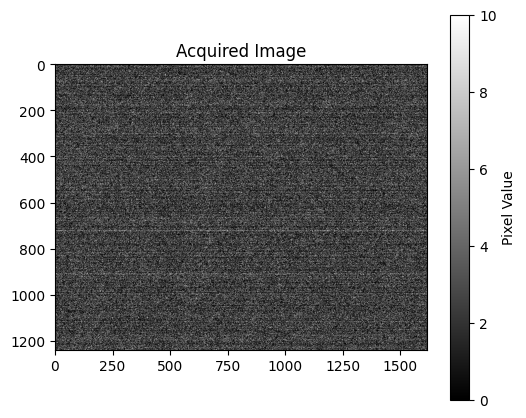

In [4]:
plt.figure(figsize=(6,5))
plt.imshow(img, cmap='gray')
plt.title('Acquired Image')
plt.colorbar(label='Pixel Value')
plt.clim([0, 10])  # Set color limits for better visibility
plt.show()

Plot histogram

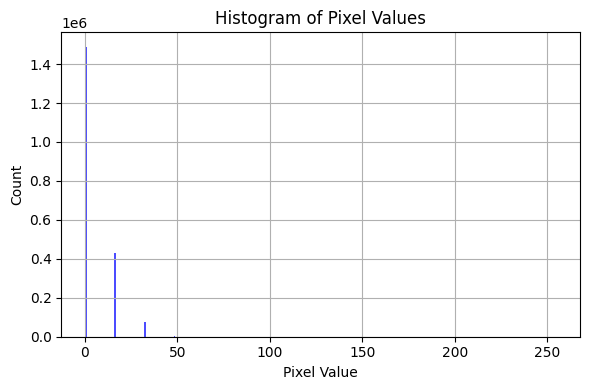

In [5]:
# Plot histogram
plt.figure(figsize=(6,4))
plt.hist(img.flatten(), bins=255, color='blue', alpha=0.7,range=(0, 255))
plt.xlabel('Pixel Value')
plt.ylabel('Count')
plt.title('Histogram of Pixel Values')
plt.grid(True)
plt.tight_layout()
plt.show()

# Introduction to Coadds and FITS File Format

## What is a Coadd?
A "coadd" is a stack of multiple images acquired in sequence, typically with the same exposure time. By averaging or summing these images, you can reduce random noise and improve the signal-to-noise ratio. In this notebook, the `Ncoadd` parameter controls how many images are acquired and combined.

## FITS File Format
When you save images using this workflow, the data is stored in a FITS (Flexible Image Transport System) file. The FITS file contains:
- **Primary HDU**: Empty (standard for multi-extension FITS files)
- **STACK extension**: The full stack of acquired images (shape: Ncoadd × height × width)
- **MEAN extension**: The mean (averaged) image computed from the stack
- **Header keywords**: Metadata, including the detector temperature (DETTEMP) if available

## Demo: Saving and Loading Images
The following code demonstrates how to acquire a stack of images, save them as a FITS file, and load the mean image back for analysis and display.

Saved stack and mean image to C:\Users\JB_Ch\Documents\code\astrotech\images\mysecondimage_tint10000_coadd3.fits
Acquired images shape: (3, 1240, 1616)
Loaded mean image shape: (1240, 1616), dtype: >f8


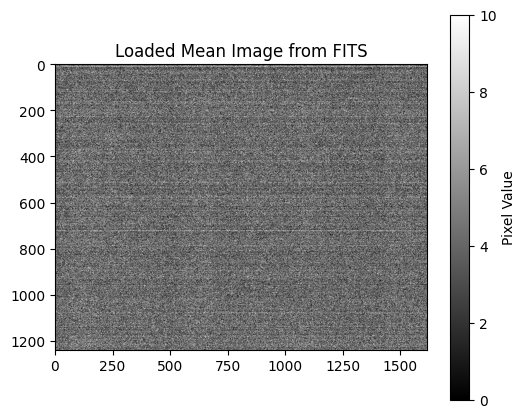

In [ ]:
# Set parameters
prefix = "mysecondimage"
tint = 10000  # 10 ms exposure
Ncoadd = 3    # Number of coadds (images to acquire and combine)

# Acquire and save images
images = acquire_images(tint, Ncoadd, outdir=outdir, prefix=prefix)
print(f"Acquired images shape: {images.shape}")

# Load the mean image from the FITS file
fits_path = os.path.join(outdir, f"{prefix}_tint{int(tint)}_coadd{Ncoadd}.fits")
hdul =  fits.open(fits_path)
mean_image = copy(hdul['MEAN'].data)
print(f"Loaded mean image shape: {mean_image.shape}, dtype: {mean_image.dtype}")
hdul.close()

# Display the mean image
plt.figure(figsize=(6,5))
plt.imshow(mean_image, cmap='gray')
plt.title('Loaded Mean Image from FITS')
plt.colorbar(label='Pixel Value')
plt.clim([0, 10])  # Set color limits for better visibility
plt.show()
